<a href="https://colab.research.google.com/github/tazwar70/IRIS-Dataset-Classification/blob/main/IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inintialize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,8)

# Data Import

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

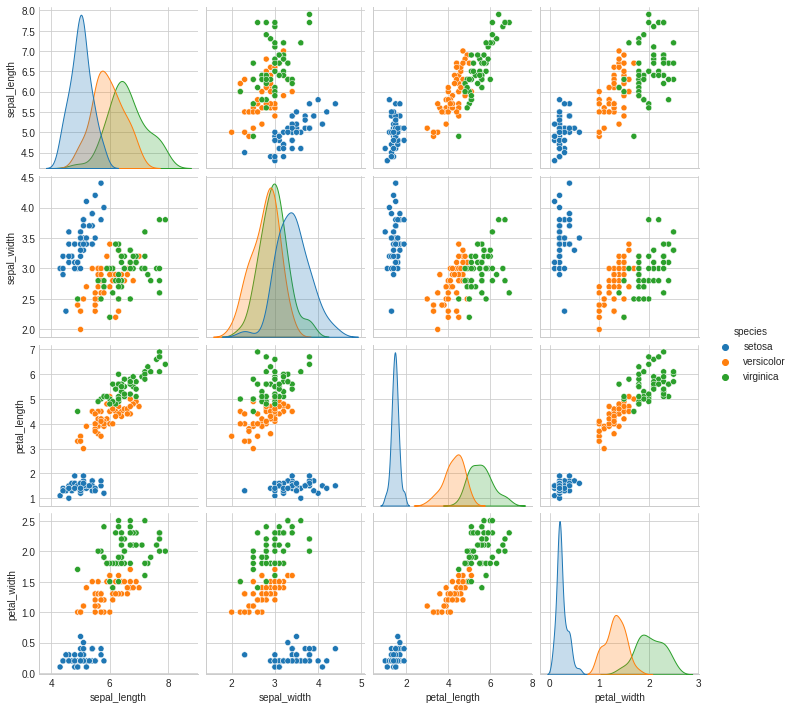

In [4]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]
sns.pairplot(df, hue="species")

# Preparing the Model

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(
    x,
    y,
    test_size = 1/3
)

# Training the Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Testing the Model

In [7]:
y_pred = model.predict(x_test)
print(f'Predicted data: {y_pred[0:10]}\n')
print(f'Test data:\n{y_test[0:10]}')

Predicted data: ['virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor']

Test data:
108     virginica
147     virginica
103     virginica
97     versicolor
137     virginica
13         setosa
47         setosa
134     virginica
106     virginica
61     versicolor
Name: species, dtype: object


# Evaluating the Model

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  0  0]
 [ 0 11  1]
 [ 0  1 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.92      0.92      0.92        12
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50



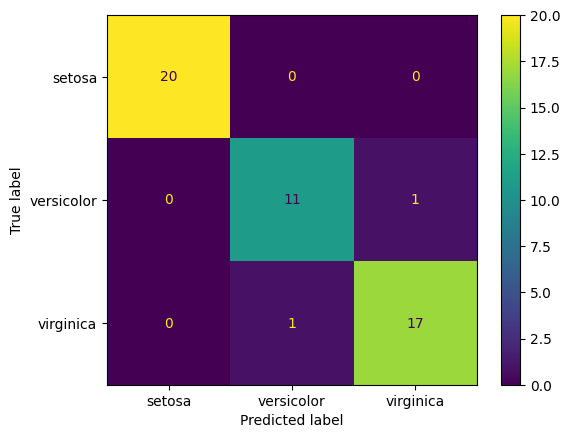

In [26]:
from sklearn.metrics import plot_confusion_matrix
plt.style.use("default")
plot_confusion_matrix(
    model,
    x_test,
    y_test
)

# Saving the Model

In [12]:
from joblib import dump
dump(model, 'iris_model.joblib') 

['iris_model.joblib']